In [1]:
import pandas as pd
df = pd.read_csv('../data/processed/productos_limpios.csv')
df

id                                              title  \
0    MCO1312345739                     Cerca 75km - Ganado - Impulsor   
1    MCO1401210195      Planta Cerca Electrica Para Ganado 50km M. Jr   
2     MCO601595467  Limpiador  Electrónico -removedor De Polvo - A...   
3     MCO611865640  Planta Cerca Eléctrica Solar 100km, Incluye Pa...   
4     MCO599963912  Tensor Metálico Para Cerca Eléctrica Para 500 ...   
..             ...                                                ...   
995   MCO542097832  Gripple Plus Medium Pack De 20 | Alambre Joine...   
996   MCO542414089  Presurizador Bomba Automatico Soluciona La Baj...   
997   MCO542469534  8,5 X 11 Sostenedor De La Muestra De Acrílico ...   
998   MCO542656528  Fantasia Walt Disney Video Laserdisc- Musical ...   
999   MCO542909729  Medidor De Alto Voltaje Para Cerca Eléctrica 1...   

                                             thumbnail   price  \
0    http://http2.mlstatic.com/D_926804-MCO70350738...  165000   
1    http://http2.mlstatic.com/D_802783-MCO74899505...  140000   
2    http://http2.mlstatic.com/D_995727-MCO73203873...   21500   
3    http://http2.mlstatic.com/D_844953-MCO45203598...  690000   
4    http://http2.mlstatic.com/D_797256-MCO71264690...    6600   
..                                                 ...     ...   
995  http://http2.mlstatic.com/D_926412-MCO44224848...  274000   
996  http://http2.mlstatic.com/D_914137-MCO45760245...  379999   
997  http://http2.mlstatic.com/D_864629-MCO40475967...  210000   
998  http://http2.mlstatic.com/D_841362-MCO28010690...   55000   
999  http://http2.mlstatic.com/D_636667-MCO69785957...   64000   

                     brand                        gtin              brand_std  \
0       CERCAS DEL ORIENTE   000223213232,000055393829     cercas del oriente   
1       JR CERCA ELECTRICA                         NaN     jr cerca eléctrica   
2              ABRO DUSTER                         NaN            abro duster   
3    UNIVERSAL ELECTRÓNICS                         NaN  universal electronics   
4                   Luxury               7707314156920                 luxury   
..                     ...                         ...                    ...   
995      Yardware etcetera  672205002204,0672205002204      yardware etcetera   
996                  Dmgas                         NaN                  dmgas   
997               Arraview  605930132700,0605930132700               arraview   
998                    NaN                         NaN                    NaN   
999                    NaN                         NaN                    NaN   

                              gtin_std  \
0     ['000055393829', '000223213232']   
1                                   []   
2                                   []   
3                                   []   
4                    ['7707314156920']   
..                                 ...   
995  ['0672205002204', '672205002204']   
996                                 []   
997  ['605930132700', '0605930132700']   
998                                 []   
999                                 []   

                                             title_std  price_std  
0                           cerca 75km ganado impulsor   165000.0  
1              planta cerca electrica ganado 50km m jr   140000.0  
2    limpiador electrónico removedor polvo aire com...    21500.0  
3    planta cerca eléctrica solar 100km incluye pan...   690000.0  
4           tensor metálico cerca eléctrica 500 metros     6600.0  
..                                                 ...        ...  
995  gripple plus medium pack 20 alambre joiner tensor   274000.0  
996  presurizador bomba automatico soluciona baja p...   379999.0  
997  8 5 x 11 sostenedor muestra acrílico transparente   210000.0  
998  fantasia walt disney video laserdisc musical e...    55000.0  
999  medidor alto voltaje cerca eléctrica 15 000 vo...    64000.0  

[1000 rows x 10 columns]

model.safetensors:  10%|#         | 115M/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Calculando KMeans para diferentes valores de k:   0%|          | 0/80 [00:00<?, ?it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
Calculando KMeans para diferentes valores de k:   1%|▏         | 1/80 [00:00<00:23,  3.42it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
Calculando KMeans para diferentes valores de k:   2%|▎         | 2/80 [00:01<00:43,  1.79it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

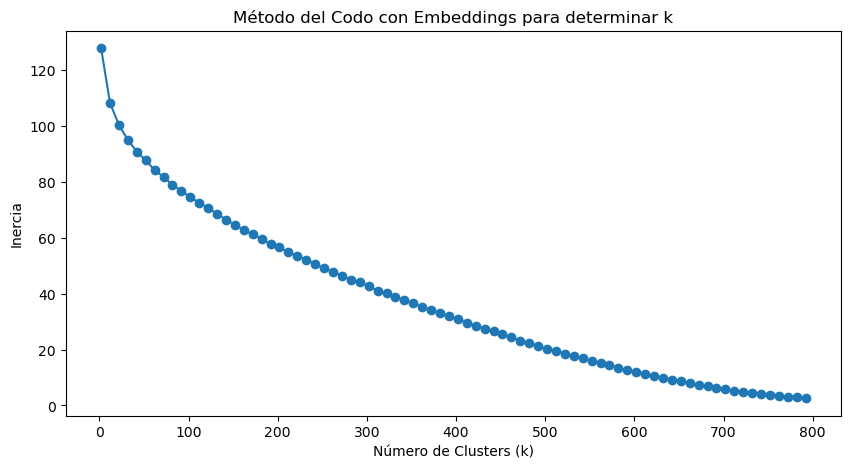

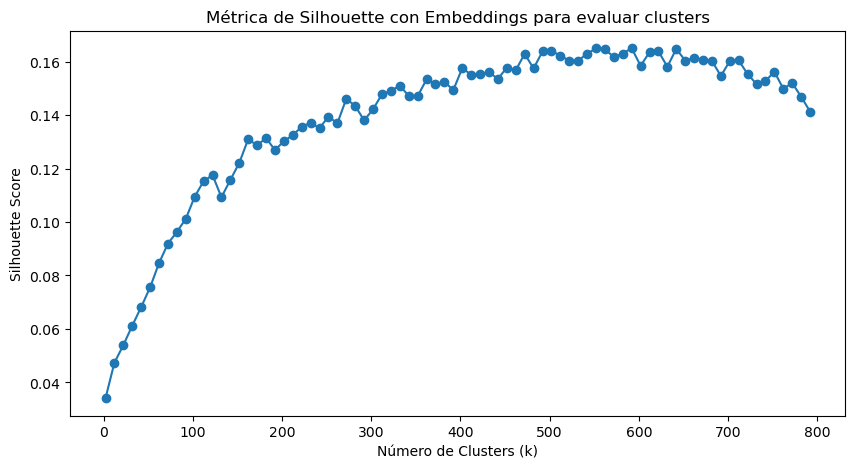

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import os
from tqdm import tqdm

os.environ["OMP_NUM_THREADS"] = "4"

# Cargar el modelo de embeddings en GPU
model = SentenceTransformer("intfloat/multilingual-e5-large-instruct").to('cuda')

# Generar embeddings para los títulos de productos
df['title_std'] = df['title_std'].astype(str)
title_embeddings = model.encode(df['title_std'].tolist(), convert_to_numpy=True, device='cuda')

# Determinar el número óptimo de clusters con el método del codo
inertia = []
silhouette_scores = []
K_range = range(2, 800, 10)

for k in tqdm(K_range, desc="Calculando KMeans para diferentes valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(title_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(title_embeddings, kmeans.labels_))

# Graficar el método del codo con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con Embeddings para determinar k')
plt.show()

# Graficar la métrica de Silhouette con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Métrica de Silhouette con Embeddings para evaluar clusters')
plt.show()


In [ ]:
import openai
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# Configurar tu clave API de OpenAI
openai.api_key = "TU_CLAVE_API"

# Función para obtener embeddings de OpenAI
def get_embeddings(text_list, model="text-embedding-3-large"):
    embeddings = []
    for text in tqdm(text_list, desc="Generando embeddings"):
        response = openai.Embedding.create(
            model=model,
            input=text
        )
        embeddings.append(response['data'][0]['embedding'])
    return np.array(embeddings)

# Cargar tus datos
# Asegúrate de que 'title_std' sea una columna en tu DataFrame
df = pd.read_csv("ruta_de_tu_archivo.csv")
df['title_std'] = df['title_std'].astype(str)

# Generar embeddings con OpenAI
title_embeddings = get_embeddings(df['title_std'].tolist())

# Determinar el número óptimo de clusters con el método del codo
inertia = []
silhouette_scores = []
K_range = range(2, 800, 10)

for k in tqdm(K_range, desc="Calculando KMeans para diferentes valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(title_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(title_embeddings, kmeans.labels_))

# Graficar el método del codo con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con Embeddings para determinar k')
plt.show()

# Graficar la métrica de Silhouette con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Métrica de Silhouette con Embeddings para evaluar clusters')
plt.show()


Calculando KMeans para diferentes valores de k:   0%|          | 0/498 [00:00<?, ?it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

Calculando KMeans para diferentes valores de k:   0%|          | 1/498 [00:00<01:21,  6.08it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

Calculando KMeans para diferentes valores de k:   0%|          | 2/498 [00:00<01:31,  5.44it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Wind

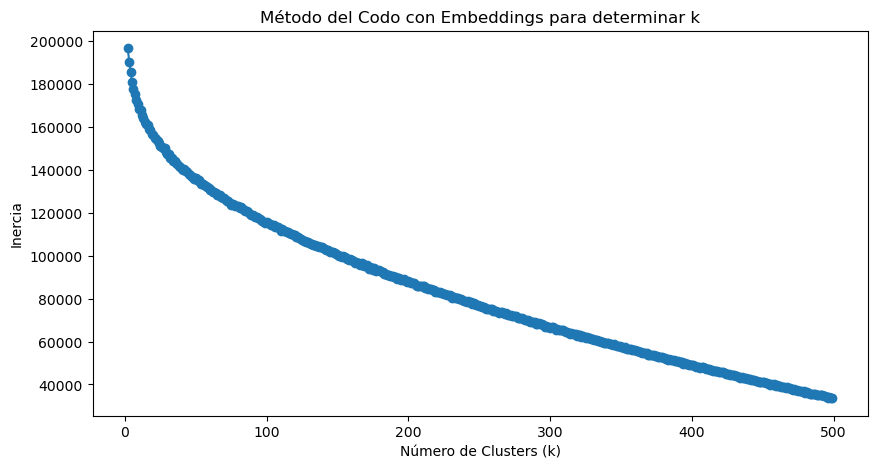

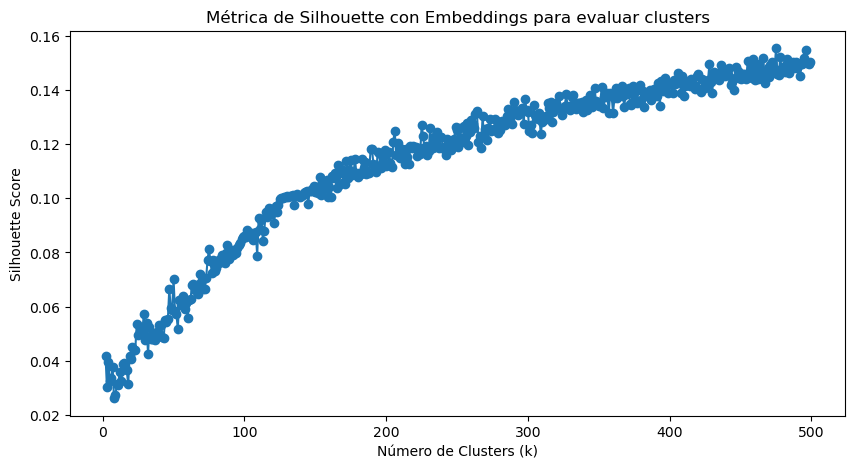

In [17]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import os
from tqdm import tqdm

os.environ["OMP_NUM_THREADS"] = "4"

# Cargar el modelo de embeddings en GPU
model = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es").to('cuda')

# Generar embeddings para los títulos de productos
df['title_std'] = df['title_std'].astype(str)
title_embeddings = model.encode(df['title_std'].tolist(), convert_to_numpy=True, device='cuda')

# Determinar el número óptimo de clusters con el método del codo
inertia = []
silhouette_scores = []
K_range = range(2, 500)

for k in tqdm(K_range, desc="Calculando KMeans para diferentes valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(title_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(title_embeddings, kmeans.labels_))

# Graficar el método del codo con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con Embeddings para determinar k')
plt.show()

# Graficar la métrica de Silhouette con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Métrica de Silhouette con Embeddings para evaluar clusters')
plt.show()


Calculando KMeans para diferentes valores de k:   0%|          | 0/499 [00:00<?, ?it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
Calculando KMeans para diferentes valores de k:   0%|          | 1/499 [00:09<1:22:41,  9.96s/it]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
Calculando KMeans para diferentes valores de k:   0%|          | 2/499 [00:19<1:22:00,  9.90s/it]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is kn

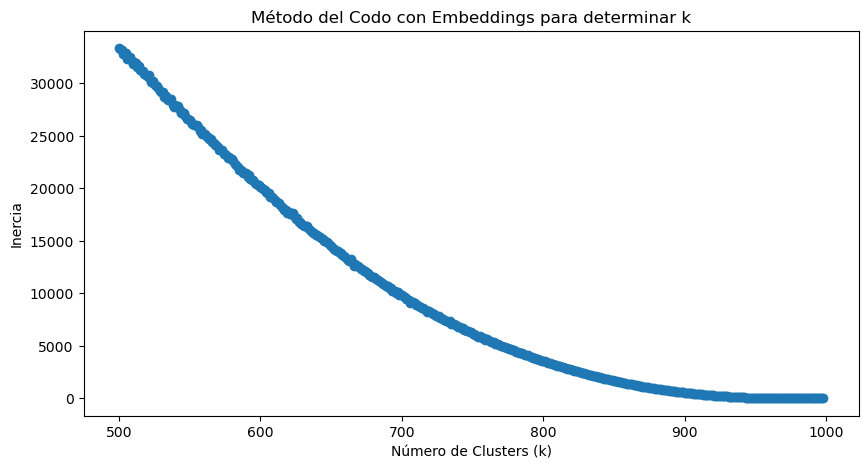

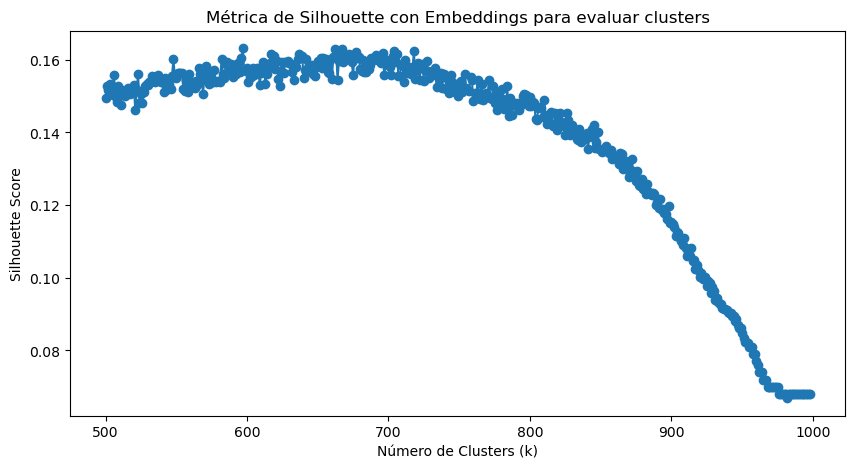

In [19]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import os
from tqdm import tqdm

os.environ["OMP_NUM_THREADS"] = "4"

# Cargar el modelo de embeddings en GPU
model = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es").to('cuda')

# Generar embeddings para los títulos de productos
df['title_std'] = df['title_std'].astype(str)
title_embeddings = model.encode(df['title_std'].tolist(), convert_to_numpy=True, device='cuda')

# Determinar el número óptimo de clusters con el método del codo
inertia = []
silhouette_scores = []
K_range = range(500, 999)

for k in tqdm(K_range, desc="Calculando KMeans para diferentes valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(title_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(title_embeddings, kmeans.labels_))

# Graficar el método del codo con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con Embeddings para determinar k')
plt.show()

# Graficar la métrica de Silhouette con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Métrica de Silhouette con Embeddings para evaluar clusters')
plt.show()


Calculando KMeans para diferentes valores de k:   0%|          | 0/80 [00:00<?, ?it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

Calculando KMeans para diferentes valores de k:   1%|▏         | 1/80 [00:00<00:24,  3.20it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

Calculando KMeans para diferentes valores de k:   2%|▎         | 2/80 [00:01<00:55,  1.40it/s]c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows

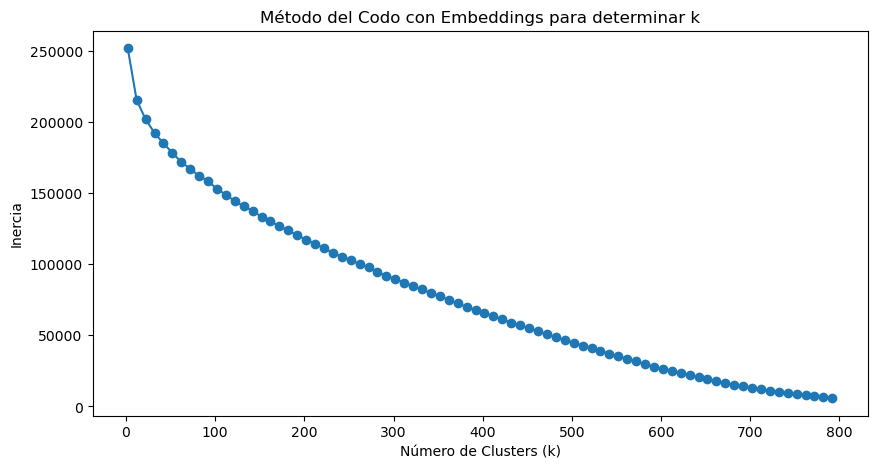

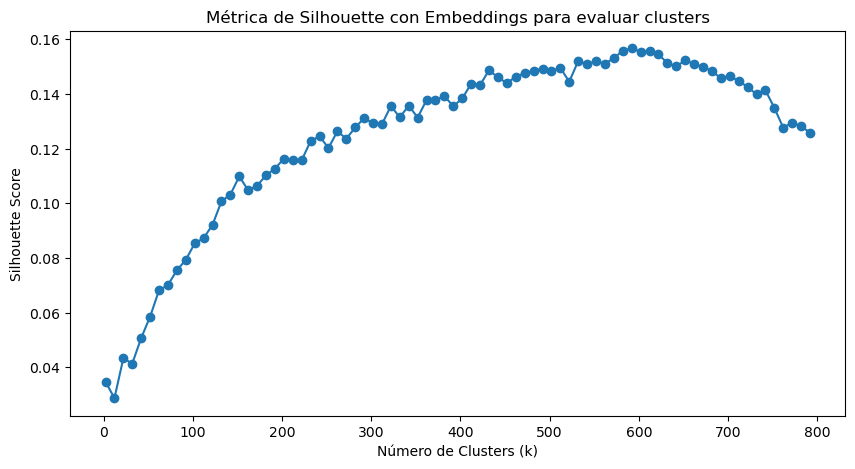

In [47]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import os
from tqdm import tqdm



# Combinar todas las características
X_combined = np.hstack((image_features, text_features))

os.environ["OMP_NUM_THREADS"] = "4"


# Determinar el número óptimo de clusters con el método del codo
inertia = []
silhouette_scores = []
K_range = range(2, 800, 10)

for k in tqdm(K_range, desc="Calculando KMeans para diferentes valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_combined, kmeans.labels_))

# Graficar el método del codo con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con Embeddings para determinar k')
plt.show()

# Graficar la métrica de Silhouette con embeddings
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Métrica de Silhouette con Embeddings para evaluar clusters')
plt.show()


In [24]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import umap
import plotly.express as px

# Cargar el modelo de embeddings en GPU
model = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es").to('cuda')

# Generar embeddings para los títulos de productos
df['title_std'] = df['title_std'].astype(str)
title_embeddings = model.encode(df['title_std'].tolist(), convert_to_numpy=True, device='cuda')

# Normalizar los precios
scaler = StandardScaler()
price_scaled = scaler.fit_transform(df[['price_std']].fillna(0))

# Concatenar embeddings con precios normalizados
X_emb = np.hstack((title_embeddings, price_scaled))

# Aplicar DBSCAN
def dbscan_clustering(X_emb, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    labels = dbscan.fit_predict(X_emb)
    return labels, dbscan

# Parámetros de DBSCAN
eps = 10  # Distancia máxima entre dos muestras para considerarlas en el mismo cluster
min_samples = 2  # Número mínimo de puntos necesarios para formar un cluster
labels, dbscan = dbscan_clustering(X_emb, eps, min_samples)

# Agregar las etiquetas al DataFrame
df['cluster'] = labels

# Reducir dimensiones con PCA (2D)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_emb)

# Reducir dimensiones con UMAP (2D)
umap_reducer_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_reducer_2d.fit_transform(X_emb)


# Visualización interactiva en 2D con Plotly (PCA)
pca_2d_fig = px.scatter(
    x=X_pca_2d[:, 0], 
    y=X_pca_2d[:, 1], 
    color=df['cluster'].astype(str),
    hover_data={'Título': df['title_std'], 'Cluster': df['cluster']},
    title='Visualización de Clusters con PCA (2D)',
    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2'}
)
pca_2d_fig.update_traces(marker=dict(size=5))
pca_2d_fig.show()

# Visualización interactiva en 2D con Plotly (UMAP)
umap_2d_fig = px.scatter(
    x=X_umap_2d[:, 0], 
    y=X_umap_2d[:, 1], 
    color=df['cluster'].astype(str),
    hover_data={'Título': df['title_std'], 'Cluster': df['cluster']},
    title='Visualización de Clusters con UMAP (2D)',
    labels={'x': 'Componente 1', 'y': 'Componente 2'}
)
umap_2d_fig.update_traces(marker=dict(size=5))
umap_2d_fig.show()

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Procesando datos: 100%|██████████| 1000/1000 [01:59<00:00,  8.35it/s]
c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Aplicando HDBSCAN...
Número de clusters encontrados: 93
Silhouette Score: 0.0309
Davies-Bouldin Score: 1.7572


c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


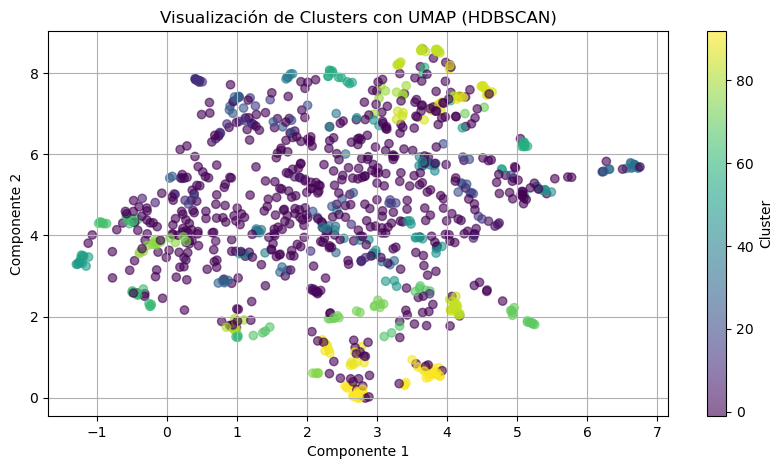

Tamaños de los clusters:
Cluster 0: 2 elementos
Cluster 1: 9 elementos
Cluster 2: 2 elementos
Cluster 3: 4 elementos
Cluster 4: 3 elementos
Cluster 5: 2 elementos
Cluster 6: 4 elementos
Cluster 7: 2 elementos
Cluster 8: 3 elementos
Cluster 9: 4 elementos
Cluster 10: 3 elementos
Cluster 11: 3 elementos
Cluster 12: 11 elementos
Cluster 13: 4 elementos
Cluster 14: 2 elementos
Cluster 15: 3 elementos
Cluster 16: 4 elementos
Cluster 17: 2 elementos
Cluster 18: 3 elementos
Cluster 19: 2 elementos
Cluster 20: 4 elementos
Cluster 21: 4 elementos
Cluster 22: 2 elementos
Cluster 23: 5 elementos
Cluster 24: 2 elementos
Cluster 25: 3 elementos
Cluster 26: 3 elementos
Cluster 27: 5 elementos
Cluster 28: 5 elementos
Cluster 29: 3 elementos
Cluster 30: 4 elementos
Cluster 31: 2 elementos
Cluster 32: 4 elementos
Cluster 33: 5 elementos
Cluster 34: 5 elementos
Cluster 35: 2 elementos
Cluster 36: 6 elementos
Cluster 37: 2 elementos
Cluster 38: 5 elementos
Cluster 39: 2 elementos
Cluster 40: 5 elementos


In [3]:
from transformers import CLIPProcessor, CLIPModel
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import HDBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from tqdm import tqdm
import pandas as pd
from PIL import Image
import torch
import requests
from io import BytesIO

# Cargar el modelo CLIP
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Cargar modelo de embeddings en español para textos (opcional, complementario a CLIP)
sentence_model = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")

# Función para procesar imágenes desde URLs con CLIP
def extract_image_features(image_url):
    try:
        response = requests.get(image_url, timeout=10)  # Descargar la imagen
        response.raise_for_status()  # Verificar si la descarga fue exitosa
        image = Image.open(BytesIO(response.content)).convert("RGB")  # Convertir a imagen PIL
        inputs = clip_processor(images=image, return_tensors="pt", padding=True)
        with torch.no_grad():
            image_features = clip_model.get_image_features(**inputs)
        return image_features.squeeze().numpy()
    except Exception as e:
        print(f"Error procesando la imagen {image_url}: {e}")
        return np.zeros((512,))  # Vector nulo en caso de error

# Función para procesar textos con CLIP
def extract_text_features(text):
    inputs = clip_processor(text=[text], return_tensors="pt", padding=True)
    with torch.no_grad():
        text_features = clip_model.get_text_features(**inputs)
    return text_features.squeeze().numpy()

# Procesar textos en español (complemento opcional)
def extract_text_features_spanish(text):
    return sentence_model.encode(text, convert_to_numpy=True)

# Procesar el DataFrame para obtener características
image_features = []
text_features = []
price_features = []
brand_encoded = []
gtin_encoded = []
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Codificar variables categóricas
brands = df['brand_std'].fillna('unknown').tolist()
onehot_encoder.fit([[b] for b in brands])

def encode_list_column(column):
    """Codificar columnas que contienen listas, como gtin_std."""
    expanded = df[column].fillna('[]').apply(eval).apply(lambda x: ','.join(x))
    return onehot_encoder.fit_transform(expanded.values.reshape(-1, 1))

gtin_encoded = encode_list_column('gtin_std')

for index, row in tqdm(df.iterrows(), total=len(df), desc="Procesando datos"):
    # Procesar imágenes
    image_features.append(extract_image_features(row['thumbnail']))

    # Procesar textos (CLIP y opcionalmente con SentenceTransformer)
    clip_text_feat = extract_text_features(row['title_std'])
    sbert_text_feat = extract_text_features_spanish(row['title_std'])
    combined_text_feat = np.hstack((clip_text_feat, sbert_text_feat))
    text_features.append(combined_text_feat)

    # Normalizar precios
    price = row['price_std'] if not pd.isnull(row['price_std']) else 0
    price_features.append([price])

    # Codificar marcas
    brand = row['brand_std'] if not pd.isnull(row['brand_std']) else 'unknown'
    brand_encoded.append(onehot_encoder.transform([[brand]]).squeeze())

# Convertir características a arrays numpy
image_features = np.array(image_features)
text_features = np.array(text_features)
price_features = StandardScaler().fit_transform(np.array(price_features))
brand_encoded = np.array(brand_encoded)

# Combinar todas las características
X_combined = np.hstack((image_features, text_features, price_features, brand_encoded, gtin_encoded))

# Aplicar HDBSCAN
print("Aplicando HDBSCAN...")
hdbscan_clusterer = HDBSCAN(min_cluster_size=2, min_samples=3, metric='cosine', cluster_selection_epsilon=0.1)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_combined)

# Agregar etiquetas de cluster al DataFrame
df['cluster'] = hdbscan_labels

# Calcular métricas de evaluación
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

if n_clusters > 1:
    silhouette_avg = silhouette_score(X_combined, hdbscan_labels, metric='cosine')
    davies_bouldin = davies_bouldin_score(X_combined, hdbscan_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
else:
    print("No se pueden calcular métricas de evaluación debido a un número insuficiente de clusters.")

# Reducir dimensiones con UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_reducer.fit_transform(X_combined)

# Visualización con UMAP
plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=hdbscan_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualización de Clusters con UMAP (HDBSCAN)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

# Mostrar tamaños de los clusters
cluster_sizes = np.bincount(hdbscan_labels[hdbscan_labels >= 0])
print("Tamaños de los clusters:")
for cluster_id, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster_id}: {size} elementos")



In [4]:
n_outliers = sum(hdbscan_labels == -1)
print(f"Número de outliers: {n_outliers}")


Número de outliers: 544



Cluster 0:
Título: brezos musical estreno mundial cast recording


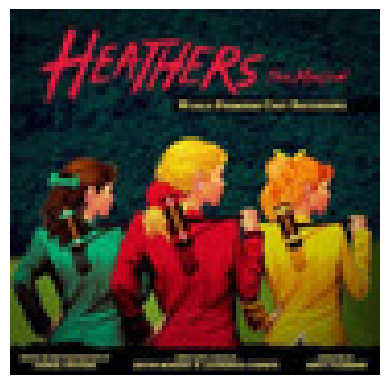

Título: fantasia walt disney video laserdisc musical eilcolombia


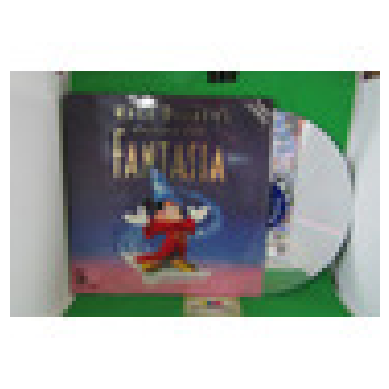


Cluster 1:
Título: caja misteriosa sorpresa master tecnología electronica


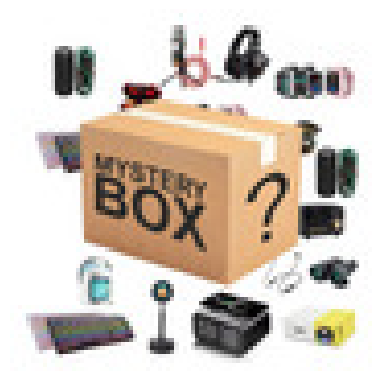

Título: caja misteriosa tecnología sorpresa variada


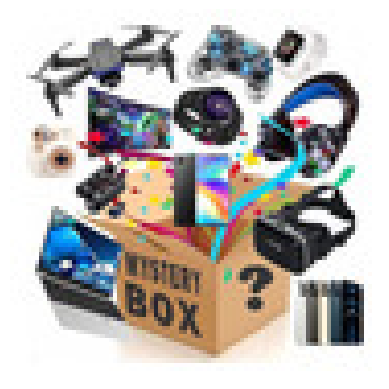

Título: caja misteriosa amazon buena calidad gamer barata tecnologia


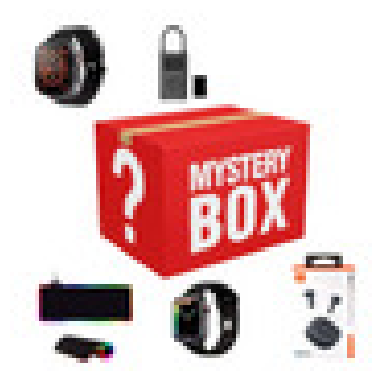

Título: caja misteriosa está caja contiene artículos electrónica


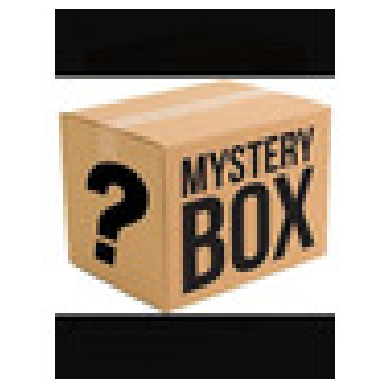

Título: caja misteriosa productos varios belleza tecnología hogar


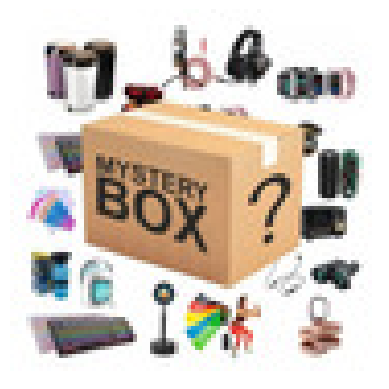


Cluster 2:
Título: 10pcs negro rojo 4mm plátano zócalo gato femenino


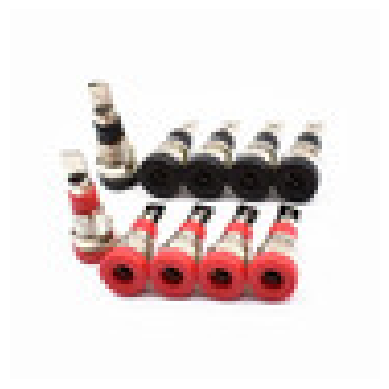

Título: calcetín varilla reacción negro azul point xl


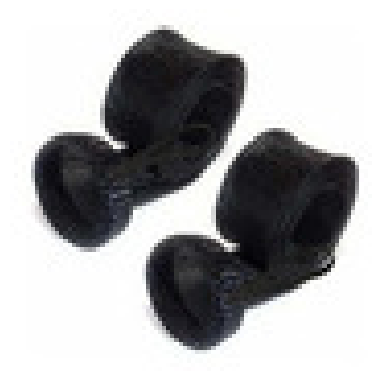


Cluster 3:
Título: scanner rastreador señal camaras microfonos gps


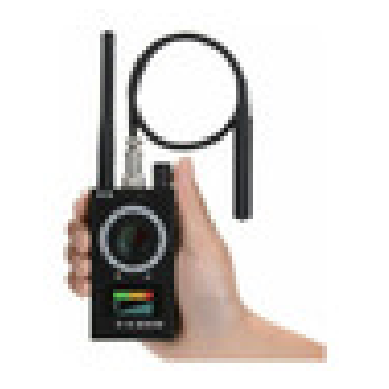

Título: detector camaras espias ocultas microfonos radiofrecuencia


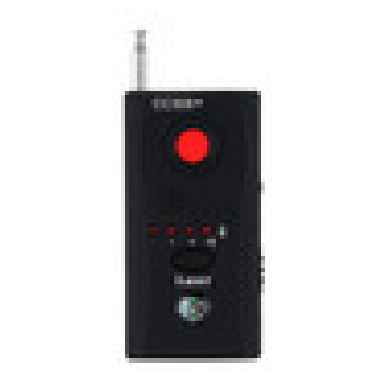

Título: escaner k 18s nueva version detector camaras ocultas mic


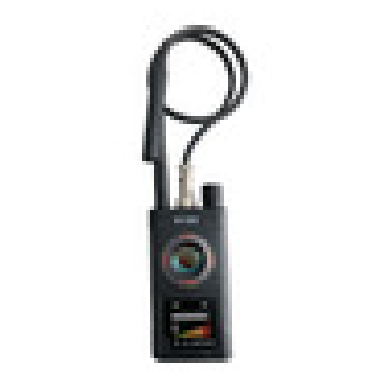

Título: escaner k 68 detector antiespia rastreador señal camaras gps


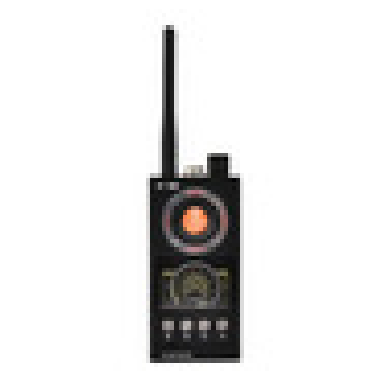


Cluster 4:
Título: cloruro ferrico papel termotransferible


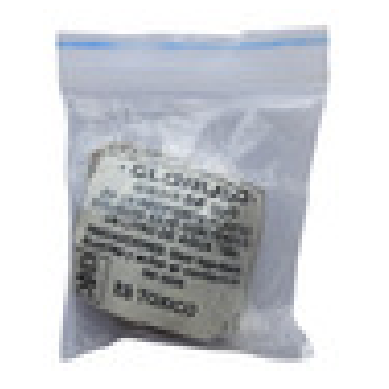

Título: cloruro ferrico 30gr acido pcb


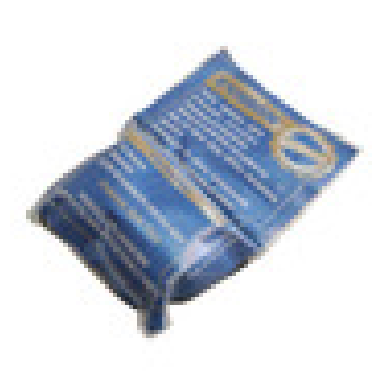

Título: cloruro ferrico papel termotransferible


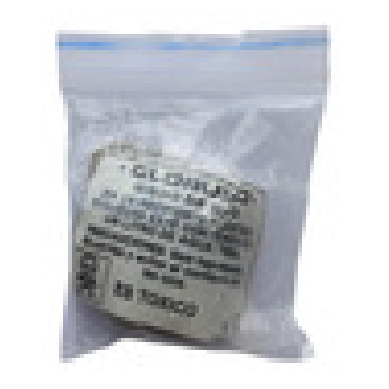

In [5]:
# Imprimir imágenes y títulos de los primeros 5 clusters
for cluster_id in range(5):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    for _, row in cluster_data.head(5).iterrows():
        print(f"Título: {row['title_std']}")
        try:
            response = requests.get(row['thumbnail'], timeout=10)
            response.raise_for_status()
            image = Image.open(BytesIO(response.content))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"No se pudo cargar la imagen: {e}")


Aplicando HDBSCAN...
Número de clusters encontrados: 199
Silhouette Score: 0.1238
Davies-Bouldin Score: 1.6245


c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



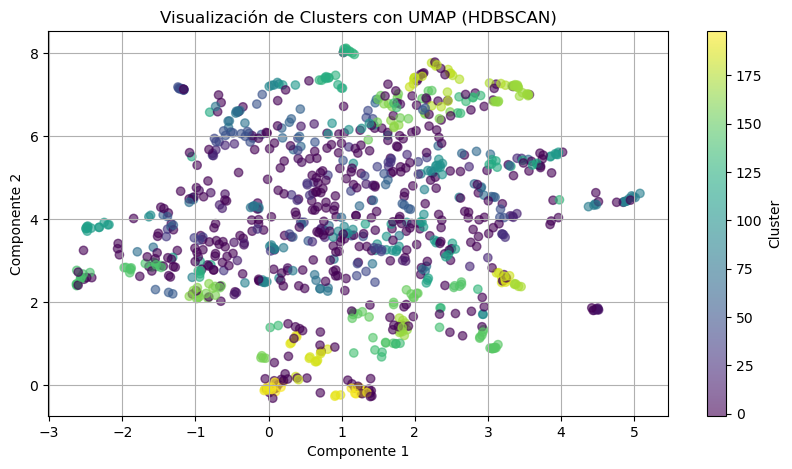

Tamaños de los clusters:
Cluster 0: 2 elementos
Cluster 1: 2 elementos
Cluster 2: 2 elementos
Cluster 3: 2 elementos
Cluster 4: 2 elementos
Cluster 5: 2 elementos
Cluster 6: 2 elementos
Cluster 7: 2 elementos
Cluster 8: 5 elementos
Cluster 9: 2 elementos
Cluster 10: 2 elementos
Cluster 11: 2 elementos
Cluster 12: 2 elementos
Cluster 13: 2 elementos
Cluster 14: 2 elementos
Cluster 15: 2 elementos
Cluster 16: 2 elementos
Cluster 17: 4 elementos
Cluster 18: 3 elementos
Cluster 19: 2 elementos
Cluster 20: 2 elementos
Cluster 21: 3 elementos
Cluster 22: 2 elementos
Cluster 23: 2 elementos
Cluster 24: 2 elementos
Cluster 25: 2 elementos
Cluster 26: 4 elementos
Cluster 27: 2 elementos
Cluster 28: 3 elementos
Cluster 29: 2 elementos
Cluster 30: 2 elementos
Cluster 31: 2 elementos
Cluster 32: 2 elementos
Cluster 33: 2 elementos
Cluster 34: 2 elementos
Cluster 35: 3 elementos
Cluster 36: 2 elementos
Cluster 37: 2 elementos
Cluster 38: 4 elementos
Cluster 39: 3 elementos
Cluster 40: 2 elementos
C

In [41]:
# Combinar todas las características
X_combined = np.hstack((image_features, text_features))

# Aplicar HDBSCAN
print("Aplicando HDBSCAN...")
hdbscan_clusterer = HDBSCAN(min_cluster_size=2, min_samples=2, metric='cosine', cluster_selection_epsilon=0.0001)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_combined)

# Agregar etiquetas de cluster al DataFrame
df['cluster'] = hdbscan_labels

# Calcular métricas de evaluación
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

if n_clusters > 1:
    silhouette_avg = silhouette_score(X_combined, hdbscan_labels, metric='cosine')
    davies_bouldin = davies_bouldin_score(X_combined, hdbscan_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
else:
    print("No se pueden calcular métricas de evaluación debido a un número insuficiente de clusters.")

# Reducir dimensiones con UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_reducer.fit_transform(X_combined)

# Visualización con UMAP
plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=hdbscan_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualización de Clusters con UMAP (HDBSCAN)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

# Mostrar tamaños de los clusters
cluster_sizes = np.bincount(hdbscan_labels[hdbscan_labels >= 0])
print("Tamaños de los clusters:")
for cluster_id, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster_id}: {size} elementos")


Número de outliers: 396



Cluster 0:
Título: kit maqueta casas rurales aedes ars


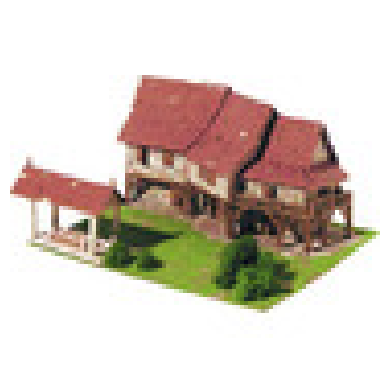

Título: casa hadas castillo helecho 4 5 x 9 encantadora


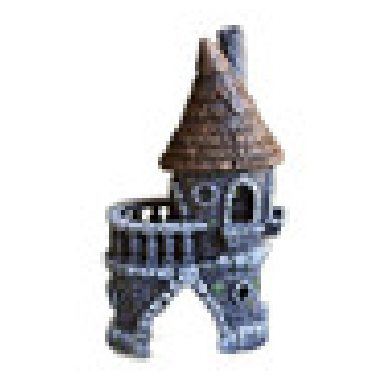


Cluster 1:
Título: claqueta cine grabacion profesional filmaciones


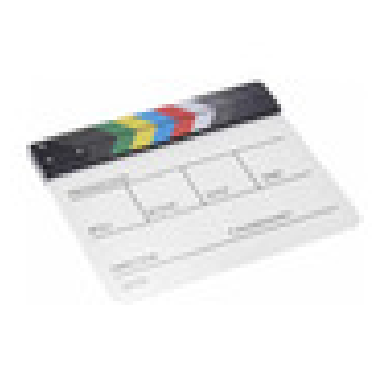

Título: fantasia walt disney video laserdisc musical eilcolombia


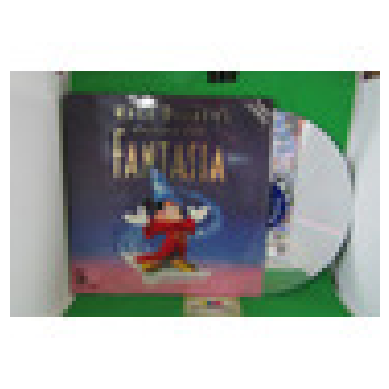


Cluster 2:
Título: energía constante té verde eso se trata v8 energy


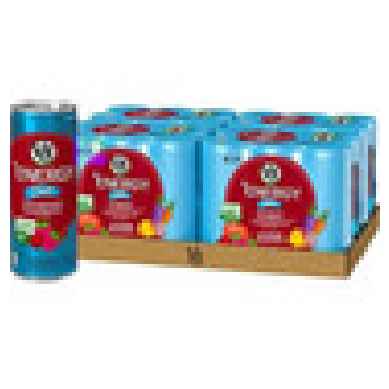

Título: energía constante té verde eso se trata v8 energy


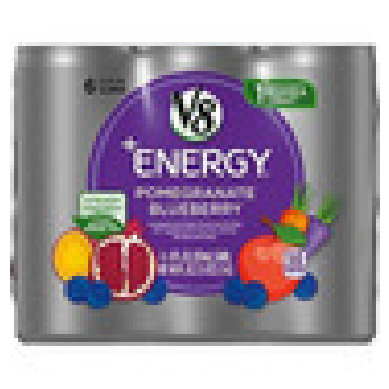


Cluster 3:
Título: latas petsafe 3 pack citronella recarga controlar ba


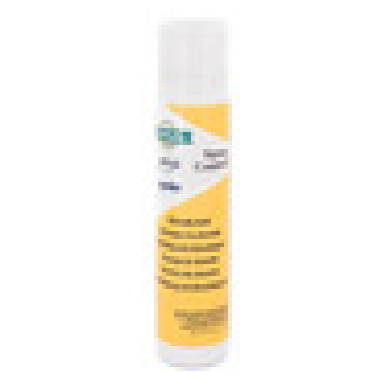

Título: desparasitante pasta durvet pyrantel 23 6gm


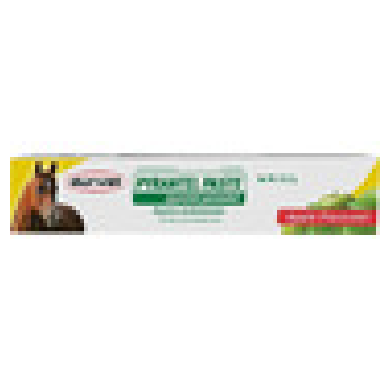


Cluster 4:
Título: puntas sonda pesca electrica repuesto


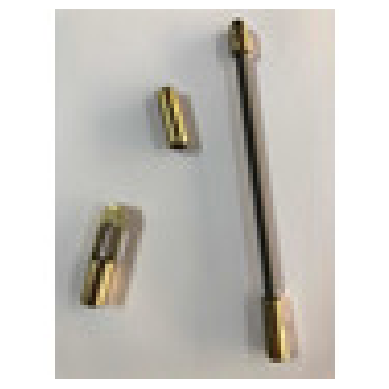

Título: puntas sonda pesca electrica repuesto


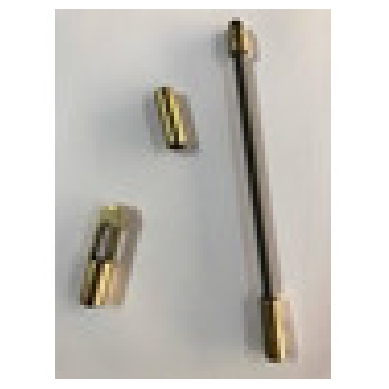

In [43]:
# Imprimir imágenes y títulos de los primeros 5 clusters
for cluster_id in range(5):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    for _, row in cluster_data.head(5).iterrows():
        print(f"Título: {row['title_std']}")
        try:
            response = requests.get(row['thumbnail'], timeout=10)
            response.raise_for_status()
            image = Image.open(BytesIO(response.content))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"No se pudo cargar la imagen: {e}")


In [21]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import umap
import plotly.express as px

# Cargar el modelo de embeddings en GPU
model = SentenceTransformer("intfloat/multilingual-e5-large-instruct").to('cuda')

# Generar embeddings para los títulos de productos
df['title_std'] = df['title_std'].astype(str)
title_embeddings = model.encode(df['title_std'].tolist(), convert_to_numpy=True, device='cuda')

# Normalizar los precios
scaler = StandardScaler()
price_scaled = scaler.fit_transform(df[['price_std']].fillna(0))

# Concatenar embeddings con precios normalizados
X_emb = np.hstack((title_embeddings, price_scaled))

# Aplicar K-Means
def kmeans_clustering(X_emb, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_emb)
    return labels, kmeans

# Número de clusters a usar
k = 700  # Ajustamos k a 50
labels, kmeans = kmeans_clustering(X_emb, k)

# Agregar las etiquetas al DataFrame
df['cluster'] = labels

# Reducir dimensiones con PCA (2D)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_emb)

# Reducir dimensiones con UMAP (2D)
umap_reducer_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_reducer_2d.fit_transform(X_emb)

# Agregar enlaces de imágenes al DataFrame (simulado)
# Asegúrate de que la columna 'image_url' contenga las URLs de las imágenes correspondientes a los productos
df['thumbnail'] = df['thumbnail'].astype(str)

# Visualización interactiva en 2D con Plotly (PCA)
pca_2d_fig = px.scatter(
    x=X_pca_2d[:, 0], 
    y=X_pca_2d[:, 1], 
    color=df['cluster'].astype(str),
    hover_data={'Título': df['title_std'], 'Cluster': df['cluster'], 'Imagen': df['thumbnail']},
    title='Visualización de Clusters con PCA (2D)',
    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2'}
)
pca_2d_fig.update_traces(marker=dict(size=5))
pca_2d_fig.show()

# Visualización interactiva en 2D con Plotly (UMAP)
umap_2d_fig = px.scatter(
    x=X_umap_2d[:, 0], 
    y=X_umap_2d[:, 1], 
    color=df['cluster'].astype(str),
    hover_data={'Título': df['title_std'], 'Cluster': df['cluster'], 'Imagen': df['thumbnail']},
    title='Visualización de Clusters con UMAP (2D)',
    labels={'x': 'Componente 1', 'y': 'Componente 2'}
)
umap_2d_fig.update_traces(marker=dict(size=5))
umap_2d_fig.show()




c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [44]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import umap
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Cargar el modelo de embeddings en GPU
model = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es").to('cuda')

# Generar embeddings para los títulos de productos
df['title_std'] = df['title_std'].astype(str)
title_embeddings = model.encode(df['title_std'].tolist(), convert_to_numpy=True, device='cuda')

# Concatenar embeddings
X_emb = title_embeddings

# Aplicar K-Means
def kmeans_clustering(X_emb, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_emb)
    return labels, kmeans

# Número de clusters a usar
k = 700  # Ajustamos k a 700
labels, kmeans = kmeans_clustering(X_emb, k)

# Agregar las etiquetas al DataFrame
df['cluster'] = labels

# Reducir dimensiones con PCA (3D)
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_emb)

# Reducir dimensiones con UMAP (3D)
umap_reducer_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_reducer_3d.fit_transform(X_emb)

# Visualización interactiva en 3D con Plotly (PCA)
for cluster_id in range(5):  # Mostrar solo 5 clusters
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_points = X_pca_3d[df['cluster'] == cluster_id]
    
    pca_fig = px.scatter_3d(
        x=cluster_points[:, 0], 
        y=cluster_points[:, 1], 
        z=cluster_points[:, 2], 
        color=cluster_data['cluster'].astype(str),
        hover_data={'Título': cluster_data['title_std'], 'Cluster': cluster_data['cluster']},
        title=f'Visualización del Cluster {cluster_id} con PCA (3D)'
    )
    pca_fig.update_traces(marker=dict(size=5))
    pca_fig.show()

# Visualización interactiva en 3D con Plotly (UMAP)
for cluster_id in range(5):  # Mostrar solo 5 clusters
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_points = X_umap_3d[df['cluster'] == cluster_id]
    
    umap_fig = px.scatter_3d(
        x=cluster_points[:, 0], 
        y=cluster_points[:, 1], 
        z=cluster_points[:, 2], 
        color=cluster_data['cluster'].astype(str),
        hover_data={'Título': cluster_data['title_std'], 'Cluster': cluster_data['cluster']},
        title=f'Visualización del Cluster {cluster_id} con UMAP (3D)'
    )
    umap_fig.update_traces(marker=dict(size=5))
    umap_fig.show()

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



10 Clusters con más productos:
cluster
607    10
23     10
181     9
39      7
419     7
296     7
434     7
517     7
6       6
43      6
Name: count, dtype: int64

Cluster 607 - 10 productos:
Título: aislador cerca eléctrica tipo pivote puntilla x100 unds


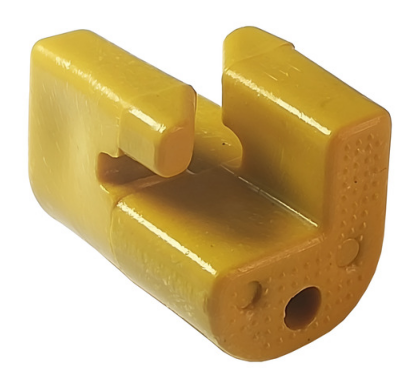

Título: aislador cerca eléctrica pivote puntilla x 100 pcs


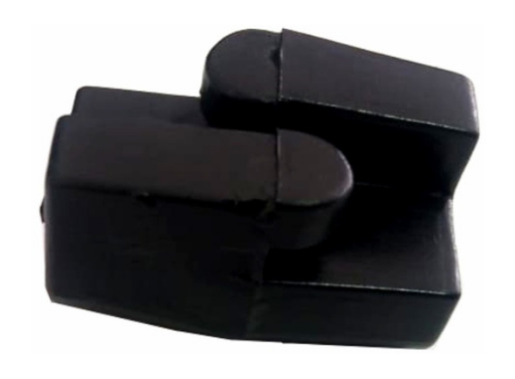

Título: aislador cerca eléctrica pivote puntilla traba 1 000unidades


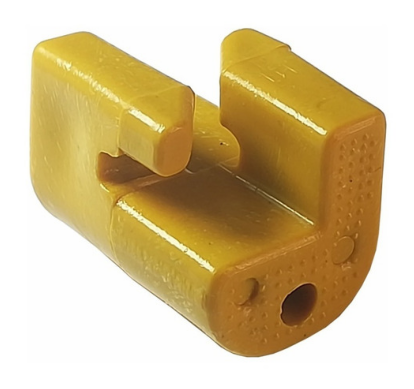

Título: aislador cerca eléctrica pivote puntilla x 1000 unids


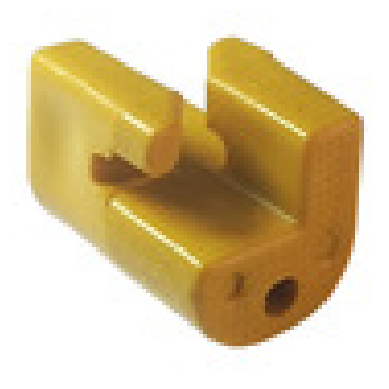

Título: aislador cerca eléctrica pivote puntilla x 1000 unidades


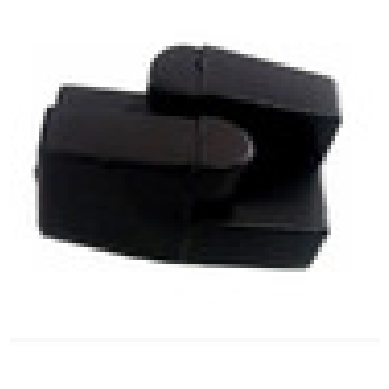


Cluster 23 - 10 productos:
Título: aislador cerca eléctrica poste varilla uv x 50 pcs


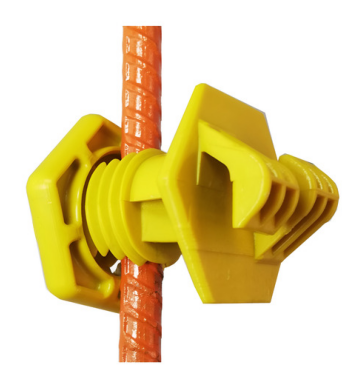

Título: aislador cerca eléctrica poste varilla uv x 100 unds


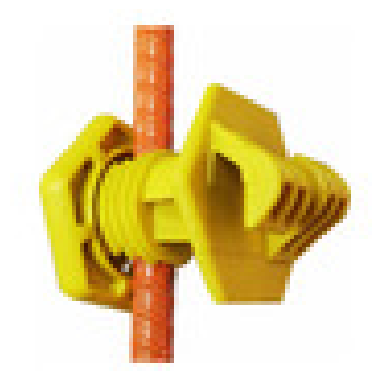

Título: aislador cerca eléctrica poste varilla uv x 50 unidades


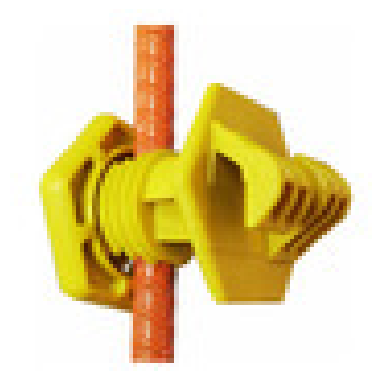

Título: aislador cerca eléctrica poste varilla x100 unds lhaura


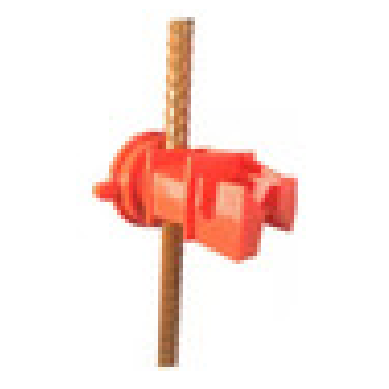

Título: aislador cerca eléctrica seguridad yoyo x 50 pcs


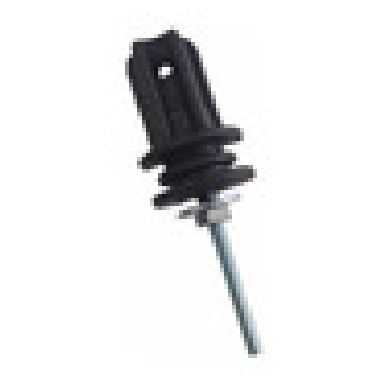


Cluster 181 - 9 productos:
Título: impulsor cerca eléctrica simmental 30km 110vac


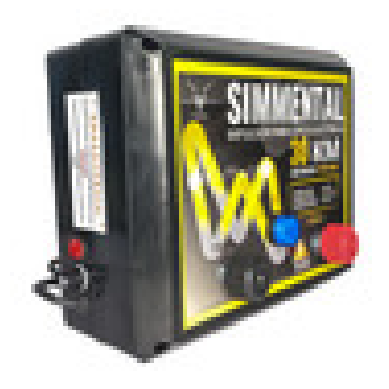

Título: impulsor cerca eléctrica 10 km 110v tnt electronics


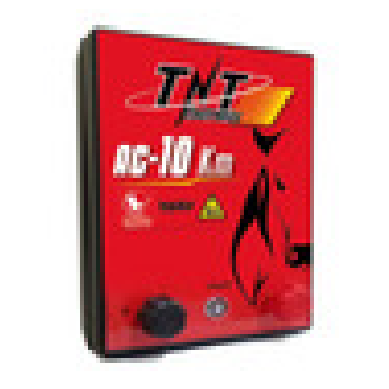

Título: impulsor cerca eléctrica 30 km 110v tnt electronics


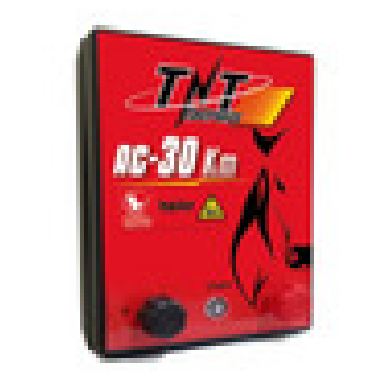

Título: impulsor cerca eléctrica 50 km 110v tnt electronics


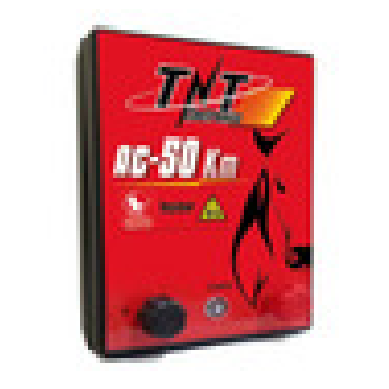

Título: impulsor cerca eléctrica 80 km 110v tnt electronics


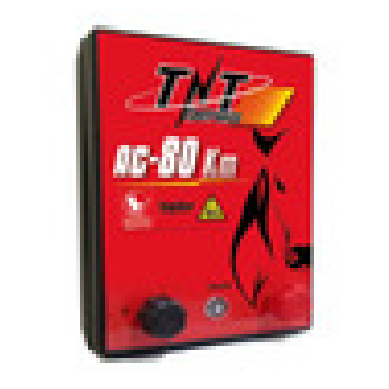


Cluster 39 - 7 productos:
Título: 2 unds cinta electro plástica cerca eléctrica 12mm200mt


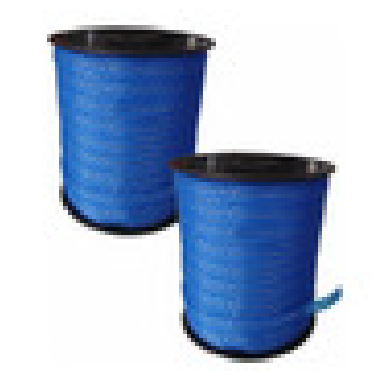

Título: cinta electro plástica cerca eléctrica 12mm 200mts


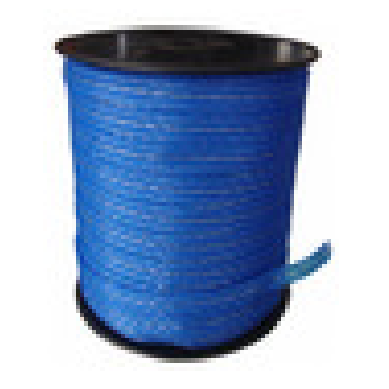

Título: cinta electro plástica cerca eléctrica 12mm 200mts x 4 unds


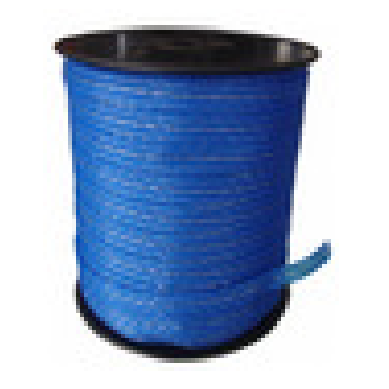

Título: cinta electro plástica cerca eléctrica 12mm 200mts azul


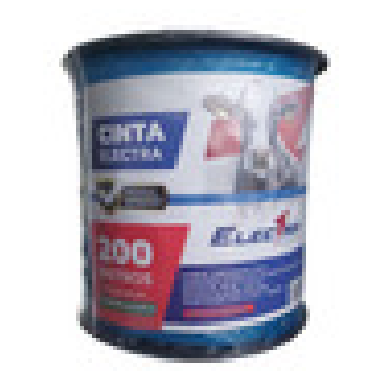

Título: cinta electro plástica cerca eléctrica 12mm 200mts


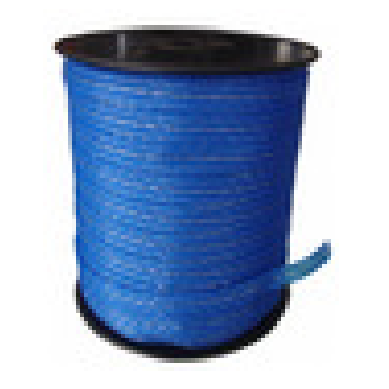


Cluster 419 - 7 productos:
Título: aislador cerca eléctrica pera inicio fin ec x 100 pcs


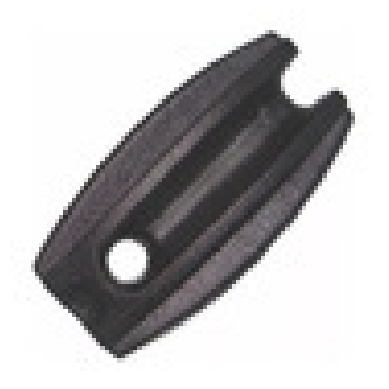

Título: aislador cerca eléctrica pera inicio fin ec x 50 pcs


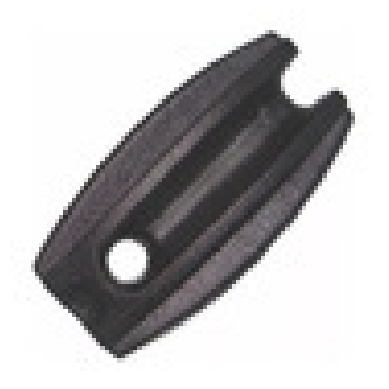

Título: aislador cerca eléctrica pera inicio fin x 100 pcs


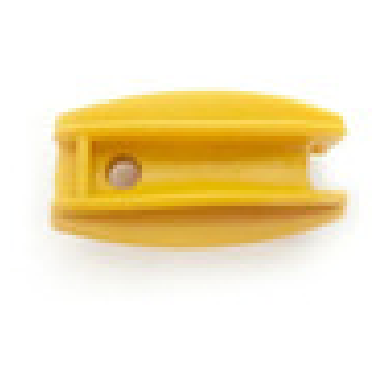

Título: aislador cerca eléctrica pera inicio fin ec x25 pcs


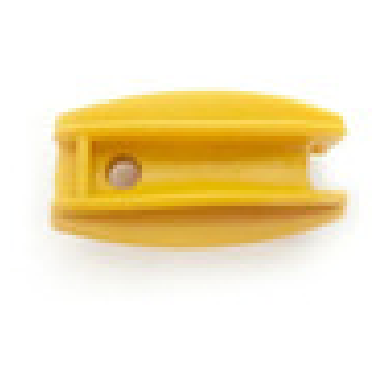

Título: aislador cerca eléctrica pera inicio fin ec x 50 pcs


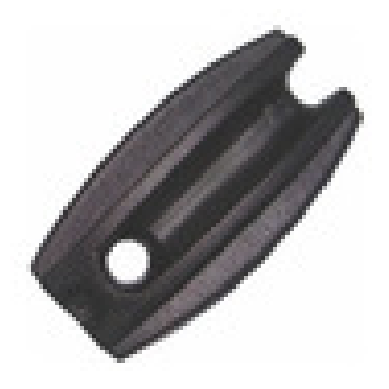


Cluster 296 - 7 productos:
Título: desviador rayos cerca eléctrica 2 electrodos x 1 pcs


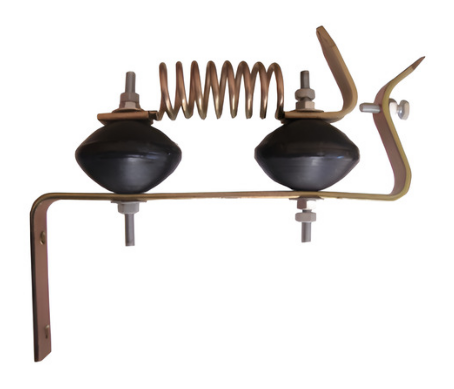

Título: desviador rayos cerca eléctrica 2 electrodos x 1 pc


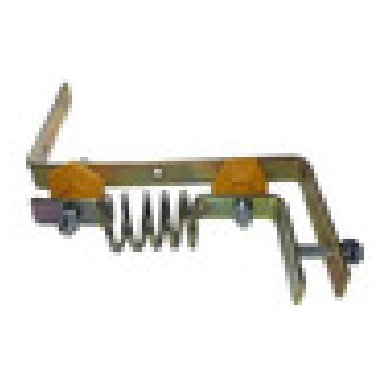

Título: desviador rayos cerca eléctrica 2 electrodos x 1 pcs


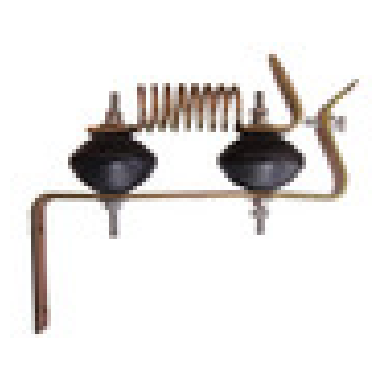

Título: desviador rayos cerca eléctrica 1 electrodo x 1 pcs


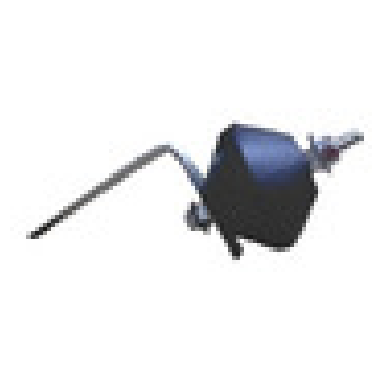

Título: desviador rayos cerca eléctrica 2 electrodos x3 unds


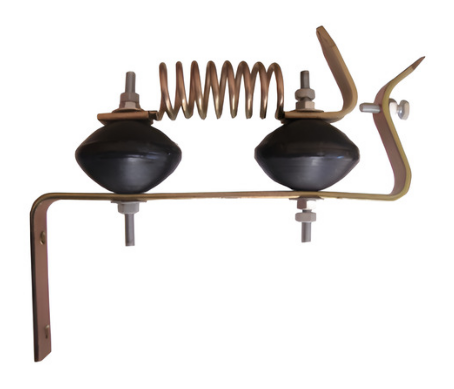


Cluster 434 - 7 productos:
Título: aislador cerca eléctrica poste varilla uv x 150 pcs


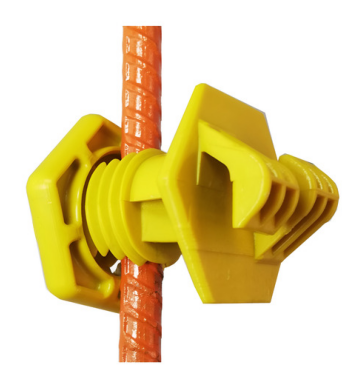

Título: aislador cerca eléctrica poste varilla uv x 200 pcs


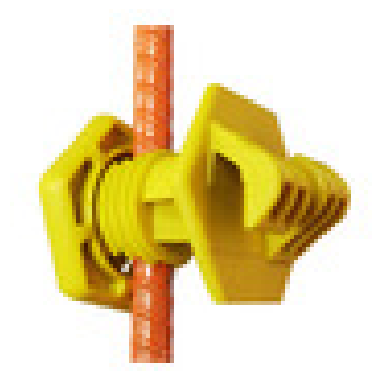

Título: aislador cerca eléctrica poste varilla uv x 200 piesas


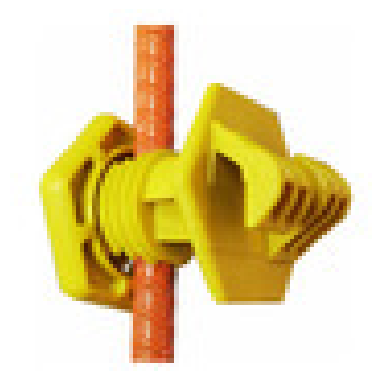

Título: aislador cerca eléctrica poste varilla uv x 150 pcs


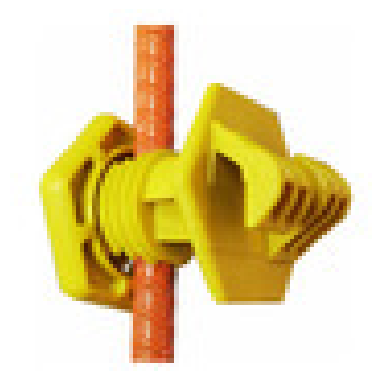

Título: aislador cerca eléctrica poste varilla uv x 100 pcs


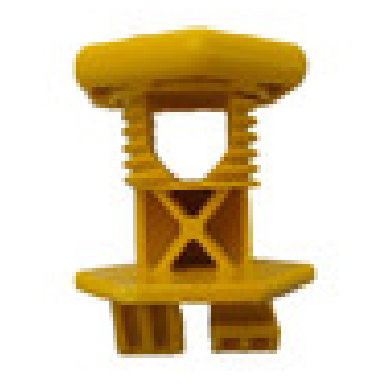


Cluster 517 - 7 productos:
Título: aislador cerca eléctrica manigueta x 10 unds


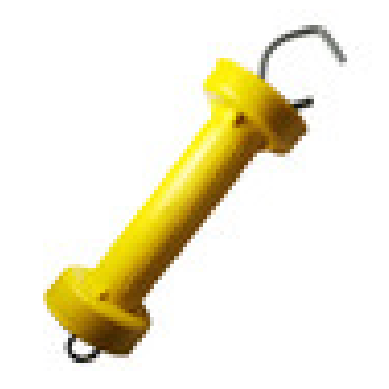

Título: manigueta portillo cerca eléctrica amarillo x 10 uniades


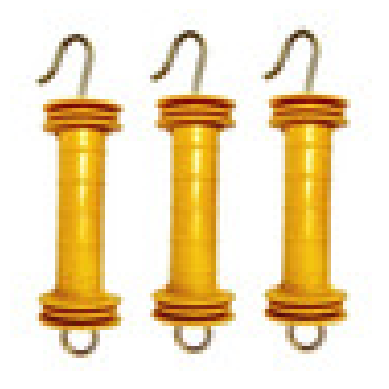

Título: aislador manigueta cerca eléctrica reforzada x 6 unidades


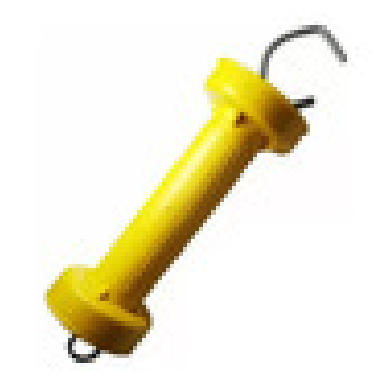

Título: aislador cerca eléctrica manigueta x 14 unds


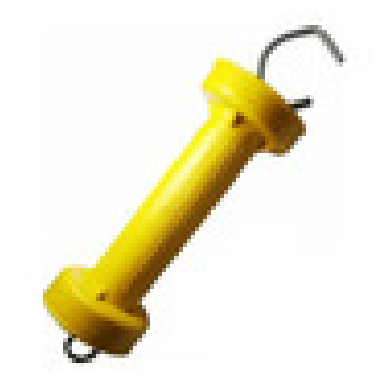

Título: aislador cerca eléctrica manigueta reforzada x 20unds


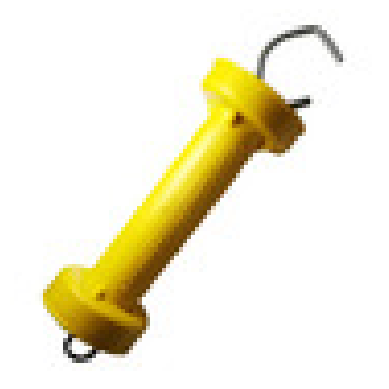


Cluster 6 - 6 productos:
Título: impulsor cerca eléctrica 30 km 12v tnt electronics


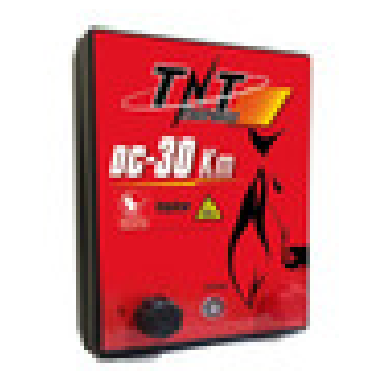

Título: impulsor cerca eléctrica 50 km 12v tnt electronics


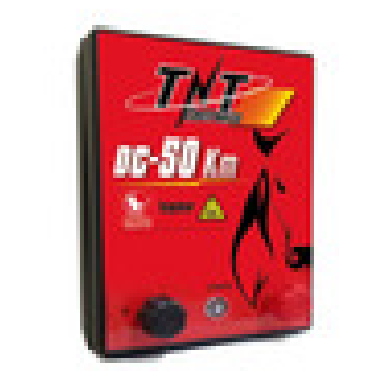

Título: impulsor cerca eléctrica 80 km 12v tnt electronics


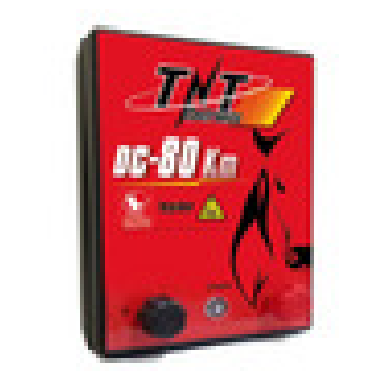

Título: impulsor cerca eléctrica 100 km 12v tnt electronics


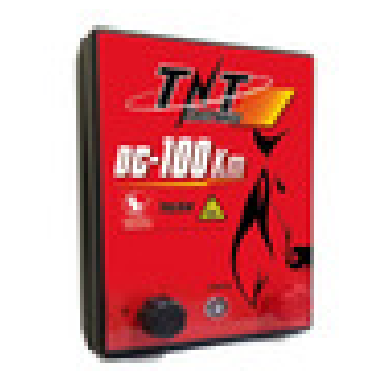

Título: impulsor cerca eléctrica 120 km 12v tnt electronics


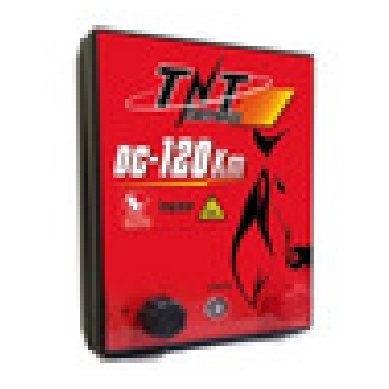


Cluster 43 - 6 productos:
Título: impulsor cerca electrica ganado 100km m jr


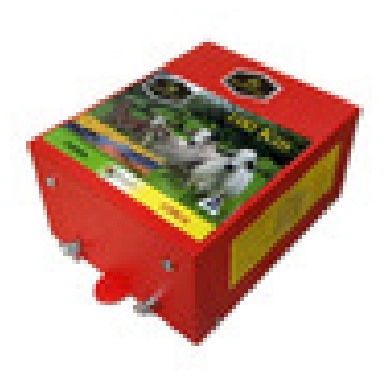

Título: impulsor cerca electrica ganado 100km 110 v ac 10 j


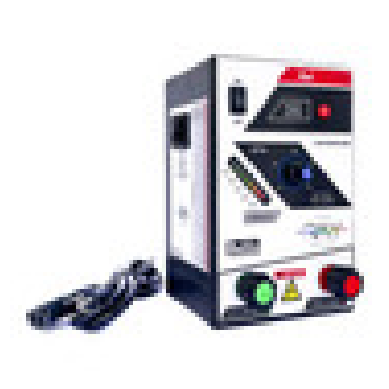

Título: impulsor cerca electrica ganado 500km 110 v ac 50j


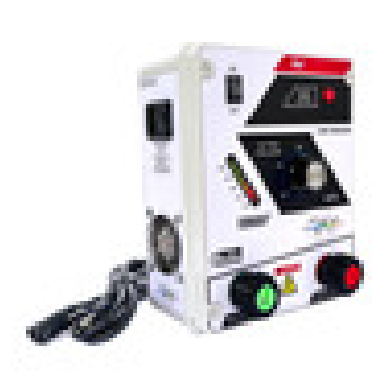

Título: impulsor cerca electrica ganado 15km 110 v ac 1 5ju


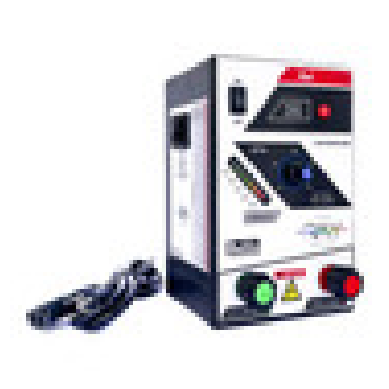

Título: impulsor cerca electrica ganado 400km 110 v ac 40 j


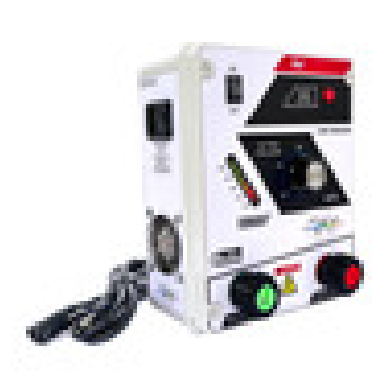

In [46]:
# Obtener los 10 clusters más grandes
cluster_counts = df['cluster'].value_counts().head(10)
print("10 Clusters con más productos:")
print(cluster_counts)

# Mostrar imágenes y nombres de los productos en los 10 clusters más grandes
for cluster_id in cluster_counts.index:
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} - {len(cluster_data)} productos:")
    for _, row in cluster_data.head(5).iterrows():  # Mostrar un máximo de 5 productos por cluster
        print(f"Título: {row['title_std']}")
        try:
            response = requests.get(row['thumbnail'], timeout=10)
            response.raise_for_status()
            image = Image.open(BytesIO(response.content))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"No se pudo cargar la imagen: {e}")